### Naive Bayes Classification on Dataset - 4

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [37]:
df=pd.read_csv('/content/dataset_4.csv')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [38]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,7,7,7,3,3,3,3,147,...,45,93,47,3,6,4,3,3,3,2
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,258,362,317,323,339,250


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [40]:
df=df.replace('?',np.NaN)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [41]:
df=df.fillna(method="ffill",limit=100)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,121,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [42]:
df=df.drop(['age'],axis=1)
df=pd.get_dummies(df)
df

,bp_100,bp_110,bp_120,bp_140,bp_180,bp_50,bp_60,bp_70,bp_80,bp_90,...,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,class_ckd,class_notckd
0,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,1,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
396,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
397,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
398,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1


In [43]:
df=df.drop(['class_notckd'],axis=1)
df

,bp_100,bp_110,bp_120,bp_140,bp_180,bp_50,bp_60,bp_70,bp_80,bp_90,...,cad_\tno,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,class_ckd
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,1
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
396,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
397,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
398,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [44]:
X=df.drop(columns='class_ckd',axis=1)
Y=df['class_ckd']
#scaler=StandardScaler()
#standardized_data=scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [45]:
model = GaussianNB()  
model.fit(X_train,Y_train) 
prediction=model.score(X_test,Y_test)
print("Accuracy:",prediction)
predicts=model.predict(X_test)

Accuracy: 0.9875


In [46]:
def print_result(data):
  df = pd.DataFrame((np.array(data)).reshape(1,-1), columns=X_train.columns)
  standard_data=scaler.transform(df)
  df = pd.DataFrame(standard_data, columns=X_train.columns)
  predict=model.predict(df)
  if predict==0:
    print("You are healthy")
  else:
    print("You are suffering from Chronic Kidney Disease")

In [47]:
#data=[65,75,1.010,3,0,0,1,0,1,122,42,1.7,136,4.7,12.6,45,7900,2.8,0,0,1,0,1,1]
#print_result(data)
#data=[75,75,1.025,3,0,1,1,0,1,128,43,280,128,4,12.6,50,10000,2.8,1,0,1,0,1,1]
#print_result(data)

In [48]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(Y_test,predicts))
print('Recall: %.3f' % recall_score(Y_test, predicts))
print('Accuracy: %.3f' % accuracy_score(Y_test, predicts))
print('F1-Score: %.3f' % f1_score(Y_test, predicts))

Precision: 0.981
Recall: 1.000
Accuracy: 0.988
F1-Score: 0.990


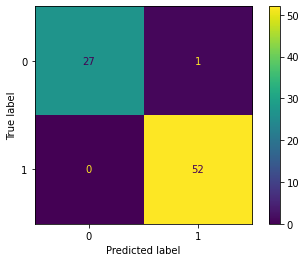

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, predicts.round())